# Partial Results of Simulations

In this notebook we are going to detail how the simulations were designed and some partial results.

## Data Generation

The data generation process began obtaining a raw image and processing it pixel-wise. Then, generating the experiment events and the design matrix with them. With this and the image processed, the voxel-wise BOLD data without noise was obtained. And finally, a procedure to generate noise to the voxel-wise BOLD data is proposed.

All the procedures explained in this section are done by the `generateSimulationData.py` Script.

### Pixel-Wise Processing of Raw Image

The raw activation image was taken from <https://en.m.wikipedia.org/wiki/File:Soccerball.svg> is the $200px \times 200 px$ football drawing shown below:

![ball](./Data/ball.png)

The white pixels were treated as $0$ and the black pixels as $1$, see it below.

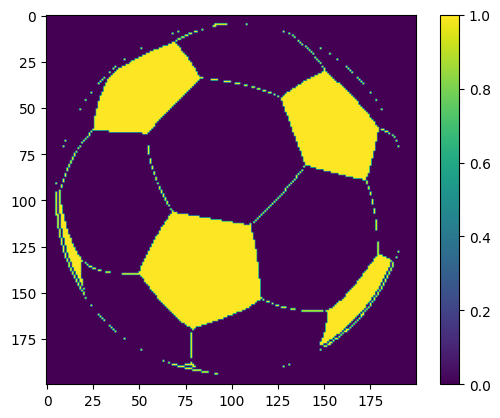

In [5]:
import numpy as np
import fMRIUtils as fmriu
b = np.load('Data/ball.npy')
fmriu.plotImage(b,200)

In [6]:
sum(b), sum(b)/40000

(7975, 0.199375)

From the $40,000$ pixels the image has, exactly $7975$ are black, hence we will have an approximate of $19.9 \%$ of activation, which is higher than usual fMRI images.

### Experiment Events and Design Matrix

The simulated experiment has 100 scans with 2 seconds between them, for a total of 200 seconds. There are 4 stimulus that last for 10 seconds. The first one occurs randomly within the first 10 to 24 seconds, and the following stimulus occur also randomly with a time difference of 36 to 50 seconds from the previous stimulus. Note that in the worst case scenario, the last stimulus will begin at 174 seconds and will end at 184 seconds. See it below.

<Axes: label='conditions', ylabel='scan number'>

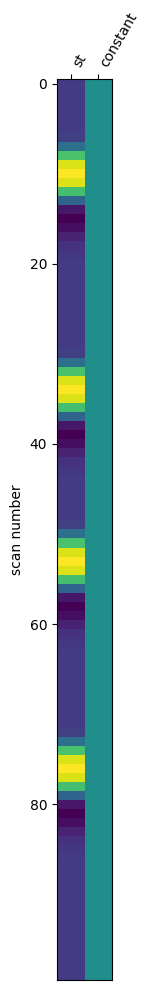

In [31]:
from nilearn.plotting import plot_design_matrix
import pandas as pd

X = pd.read_csv('Data/Simulations/X.csv')
plot_design_matrix(X)


### Voxel-Wise BOLD Data without Noise

The BOLD data was generated by taking the product of the design matrix of dimension $(100,2)$ and $\beta$ vectors of dimension $(2,1)$, where the first element of the vector takes a value of $15$ when the voxel is activated and a value of $0$ when is not. Additionally, the second element of the $\beta$ vector (corresponding to the intercept) is always $128$. This was done for each of the $40000$ voxels. See the BOLD data map below.

In [2]:
import pandas as pd
BOLD = pd.read_csv('Data/Simulations/BOLD.csv')
BOLD

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v39991,v39992,v39993,v39994,v39995,v39996,v39997,v39998,v39999,v40000
0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
1,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
2,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
3,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
4,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
96,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
97,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
98,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0


### Generate Noise in BOLD Data

To generate noise in the BOLD data, the `generateSignal()` function was used. This function uses an ARIMA Model to simulate the noise. The noise has a mean value of $0$, a variance of $3$. The values of $P$ and $Q$ were iterated $50$ times from $0$ to $3$ each. This was done for each of the $40000$ voxels. In general, each BOLD data with noise is saved as: `BOLD_PxQyRz.csv` with $x,y \in [0,3]$ and $z \in [1,50]$. See an example below.

In [3]:
BOLD_P0Q0R2 = pd.read_csv('Data/Simulations/BOLD_P0Q0R2.csv')
BOLD_P0Q0R2

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v39991,v39992,v39993,v39994,v39995,v39996,v39997,v39998,v39999,v40000
0,128.308237,129.365691,126.971928,129.013668,127.623052,131.129761,126.438881,128.808036,128.168655,127.257310,...,124.154398,125.974470,126.156832,124.790933,126.668198,127.257578,129.561637,126.075589,126.495406,127.608593
1,126.511660,132.298664,126.508414,126.137586,129.640935,129.911118,128.144133,126.730247,129.128869,130.471984,...,131.096905,129.041413,127.785185,129.538544,126.874606,128.154449,129.875786,131.281162,128.958937,123.794757
2,127.718362,126.827846,132.677981,126.586704,125.749820,125.472009,128.536391,128.459055,131.118158,127.309045,...,129.184319,125.741958,129.975654,126.196359,126.495457,128.402196,127.945015,127.792428,127.993746,127.007383
3,127.508950,128.879086,129.978135,129.761023,130.970102,128.407706,128.843703,129.367439,127.068574,127.395614,...,127.947145,129.906922,129.246452,126.860961,130.398831,129.650517,129.175412,125.393106,127.547313,128.875104
4,130.581485,127.377263,126.887966,130.568636,128.604417,126.340144,126.161224,128.282968,127.822655,127.917222,...,131.327975,124.222915,131.126763,127.378732,128.649208,125.736104,128.016248,128.264990,129.862753,127.310497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129.709836,128.502625,125.870685,129.355154,126.277801,130.897072,127.370888,129.169752,130.449901,125.335338,...,128.752452,129.665568,127.218355,128.607077,127.487134,127.019618,130.619616,125.067605,127.071810,127.651007
96,126.985654,127.684512,130.472110,128.575478,129.354649,126.227838,125.279637,126.314658,126.292570,129.295334,...,129.583011,124.782374,128.745895,126.750646,126.546352,125.362118,128.211348,130.905420,128.330433,126.827544
97,126.814790,128.993631,131.132537,129.990251,128.045786,125.253175,130.618197,130.828640,128.158000,127.287078,...,126.685071,128.353182,126.666740,128.330202,130.161940,129.477553,128.859035,130.321043,129.402251,128.325213
98,124.788106,127.938349,127.373009,127.291863,127.390626,129.841993,127.451617,126.760848,128.931012,127.975937,...,131.587309,128.359560,129.058396,129.667987,129.018653,125.354988,125.748607,126.253531,129.221794,127.472953


#### SNR of the BOLD Data

The Signal-to-Noise Ratio ranges from $6$ to $10$ in $P,Q = 0$.

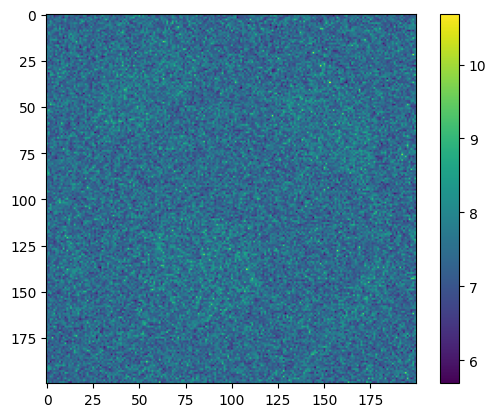

In [7]:
SNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P0Q0R2[c].values
    SNR_IM.append(fmriu.SNR(s2,s1))
SNR_IM = np.array(SNR_IM)

fmriu.plotImage(SNR_IM,200)

The Signal-to-Noise Ratio ranges from $1$ to $6$ in $P,Q = 3$.

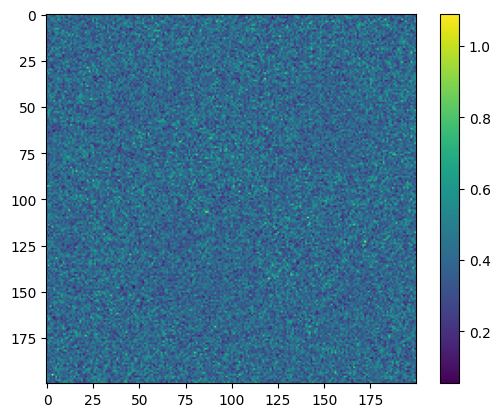

In [41]:
BOLD_P3Q3R1 = pd.read_csv('Data/Simulations/BOLD_P3Q3R1.csv')

SNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P3Q3R1[c].values
    SNR_IM.append(fmriu.SNR(s2,s1))
SNR_IM = np.array(SNR_IM)

fmriu.plotImage(SNR_IM,200)

## Bayesian Model

The Bayesian Model takes the BOLD data with noise of each run and the design matrix in order to estimate the values of the $\beta$ vectors a $1000$ times. Then, a frequency probability is calculated to obtain the probability of having the first element of the vector greather than $0$. All this process is done for each voxel, obtaining then a probability map that can be interpreted as the probability of having the voxels activated. See an example below.

All the procedures explained in this section are done by the `bayesianModel.py` Script.

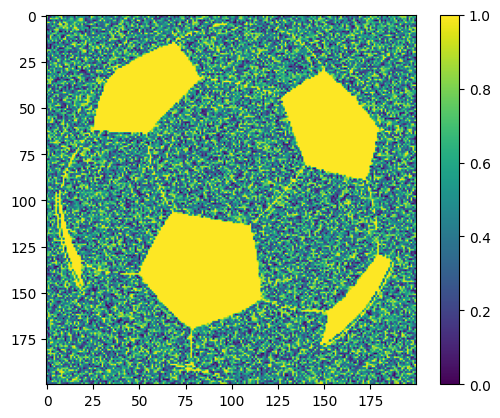

In [15]:
stProb_P0Q0 = pd.read_csv('Data/Simulations/stProb_P0Q0.csv',index_col=0)
r1_stProb_P0Q0 = stProb_P0Q0.loc[0].values

fmriu.plotImage(r1_stProb_P0Q0,200)

## Threesholding and Smoothing

The threesholding and smoothing algorithm takes the probability map obtained in each run and at the same time eliminates the noise of the map and generates a threeshold probability that indicates whether each voxel is truly activated or not. The algorithm uses the Jaccard index of the generated images to terminate. The results are stored in four files for each run, these are:

- `Zeta_PxQyRz.npy`: Contains the activation map in each iteration
- `eta_PxQyRz.npy`: Contains the threeshold value in each iteration
- `N_PxQyRz.npy`: Contains the number of inactive voxels in each iteration
- `X_PxQyRz.npy`: Contains the probability maps in each iteration

See an example of the results below.

All the procedures explained in this section are done by the `th_sm.py` Script.

### Last activation map

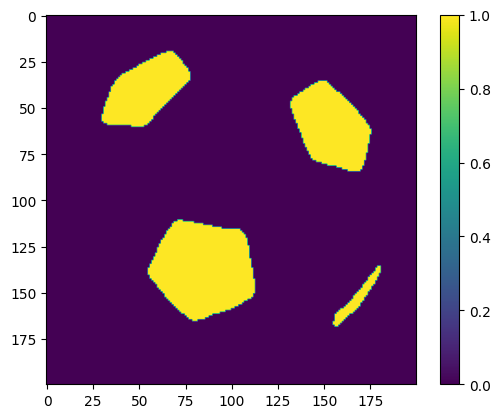

In [39]:
Zeta_P0Q0R1 = np.load('Data/Simulations/Zeta_P0Q0R1.npy')
fmriu.plotImage(Zeta_P0Q0R1[6],200)

### Threeshold values

In [22]:
eta_P0Q0R1 = np.load('Data/Simulations/eta_P0Q0R1.npy')
eta_P0Q0R1

array([0.95001183, 0.94999799, 0.94999687, 0.94999655, 0.94999643,
       0.94999637])

### Number of inactive voxels in each iteration

In [23]:
N_P0Q0R1 = np.load('Data/Simulations/N_P0Q0R1.npy')
N_P0Q0R1

array([40000, 33373, 33804, 34106, 34382, 34627, 34870])

### Last Probability Map

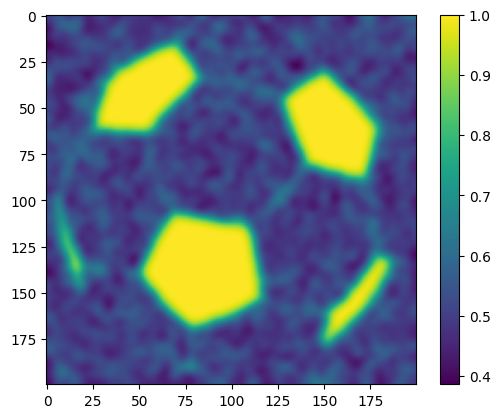

In [24]:
X_P0Q0R1 = np.load('Data/Simulations/X_P0Q0R1.npy')
fmriu.plotImage(X_P0Q0R1[len(X_P0Q0R1)-1],200)

## Other Results

The Jaccard Index between the original image and the final probability map can be easily calculated

In [40]:
import fMRIUtils as fmriu
fmriu.jaccardIndex(Zeta_P0Q0R1[1],b)

0.8309717868338558